# Copyright (c) 2024, Nashra Ghaffar
# All rights reserved.

#removing any file or folder


In [ ]:
!rm -rf train datasets test valid runs Iris Detection.v3i.yolov8.zip sample_data Iris Detection.v4i.yolov8.zip README.roboflow.txt data.yaml


In [ ]:
!rm -rf runs/segment/predict predict2


#Checking GPU

In [1]:
!nvidia-smi

Tue Jul 30 00:48:50 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


#Installations

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


#importing

In [4]:
from ultralytics import YOLO
from IPython.display import display, Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

from skimage.filters import gabor_kernel
from scipy.ndimage import convolve

#Importing segmented data

In [5]:
import os
import zipfile

file_path = "/content/Iris Segmentation.v8i.yolov8.zip"

# Verify file path
print("File path:", file_path)

if os.path.exists(file_path):
    print("File exists:", file_path)
    try:
        with zipfile.ZipFile(file_path, "r") as zip_ref:
            print("Extracting files...")
            zip_ref.extractall(".")
            print("Extraction completed.")
    except zipfile.BadZipFile:
        print("Error: Bad ZIP file.")
    except zipfile.LargeZipFile:
        print("Error: ZIP file requires ZIP64 functionality but it is not enabled.")
    except Exception as e:
        print("An error occurred:", e)
else:
    print("File not found:", file_path)


File path: /content/Iris Segmentation.v8i.yolov8.zip
File exists: /content/Iris Segmentation.v8i.yolov8.zip
Extracting files...
Extraction completed.


#Training model (Yolov8)



In [6]:
!yolo task=segment mode=train model=yolov8s-seg.pt data='/content/data.yaml' epochs=10 imgsz=640

100% 22.8M/22.8M [00:00<00:00, 42.4MB/s]
New https://pypi.org/project/ultralytics/8.2.69 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=Non

#Confusion Matrix

/content


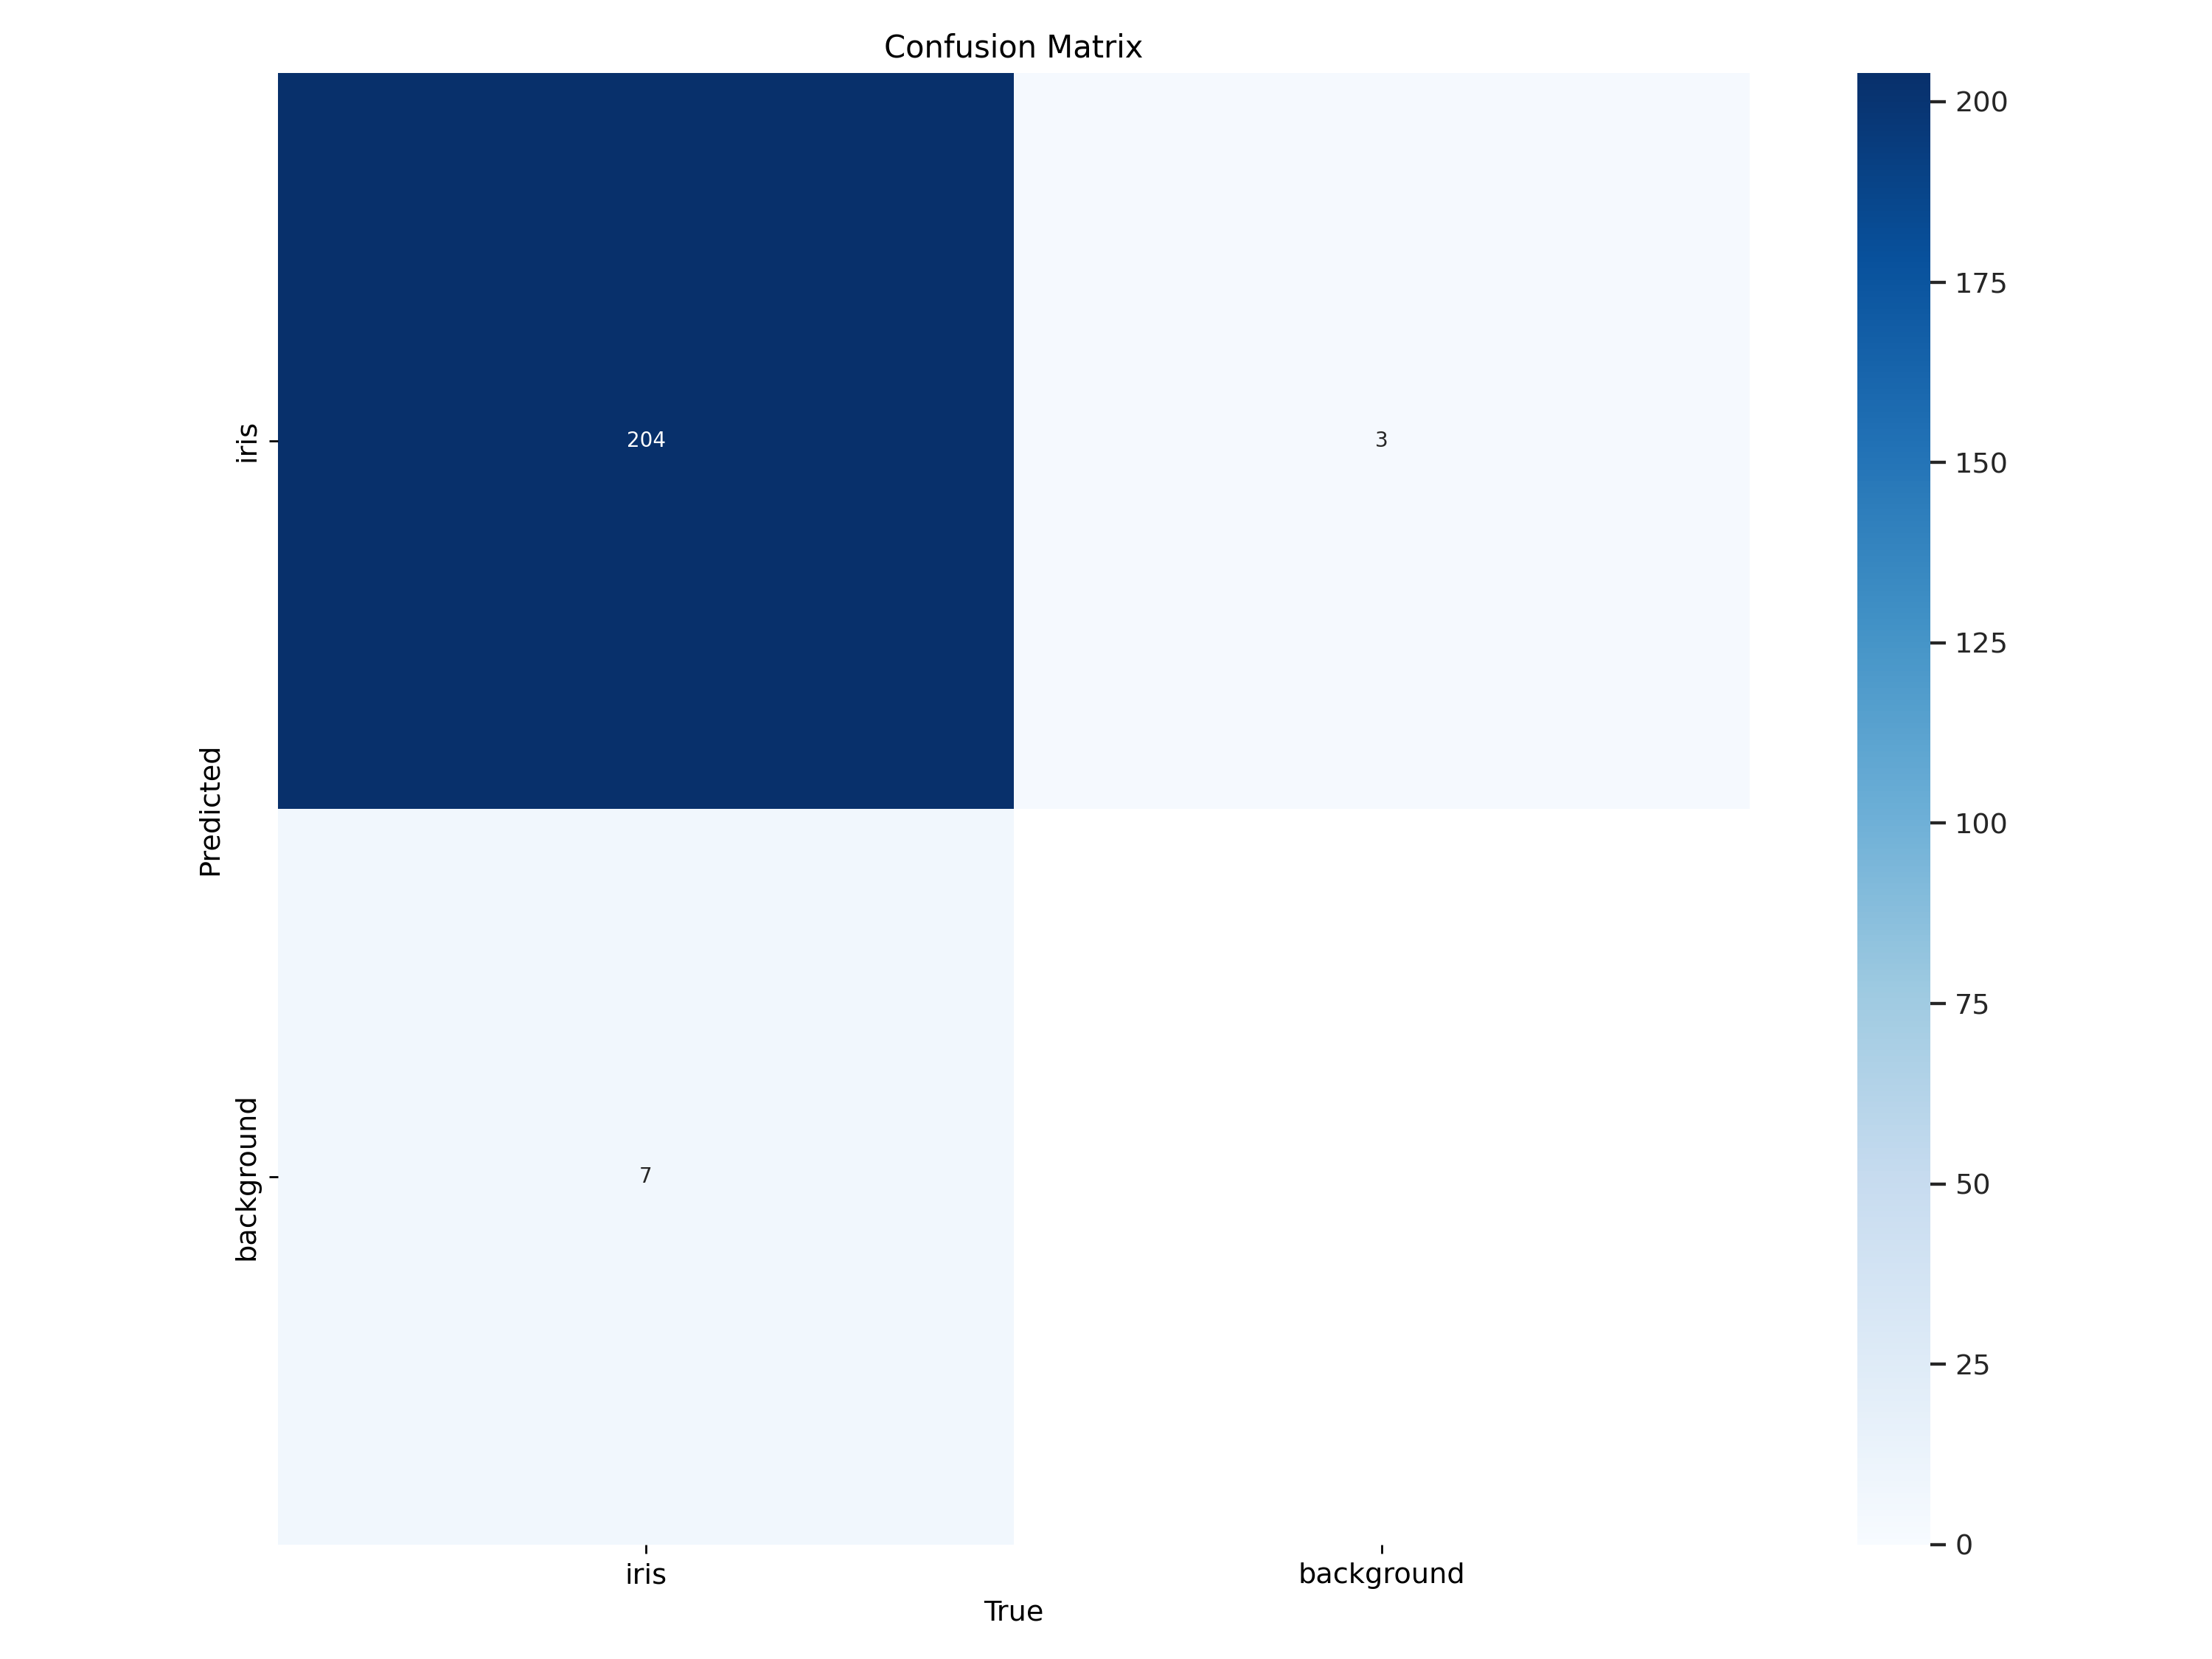

In [7]:
from IPython.display import Image, display

%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

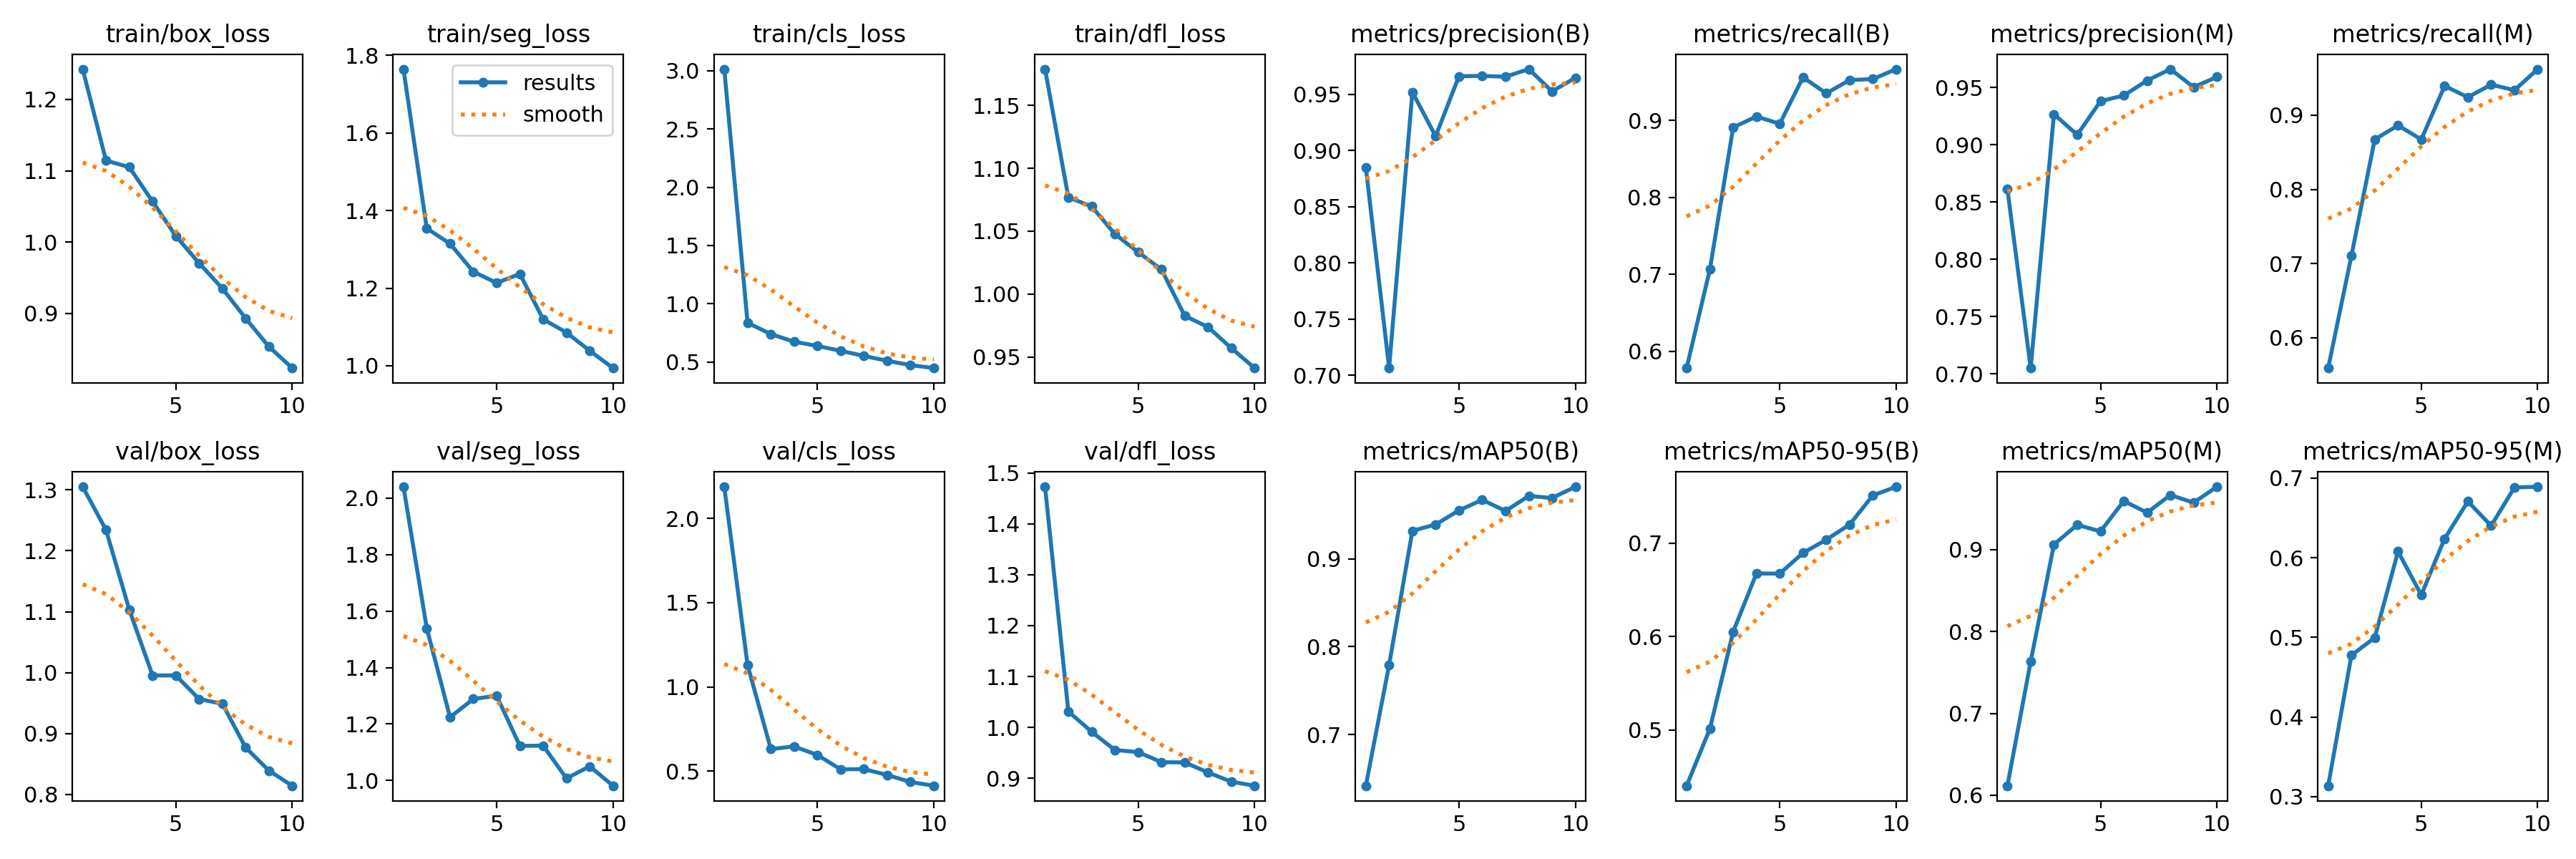

In [11]:
Image(filename='/content/runs/segment/train/results.png', width=900)

#Validating

/content


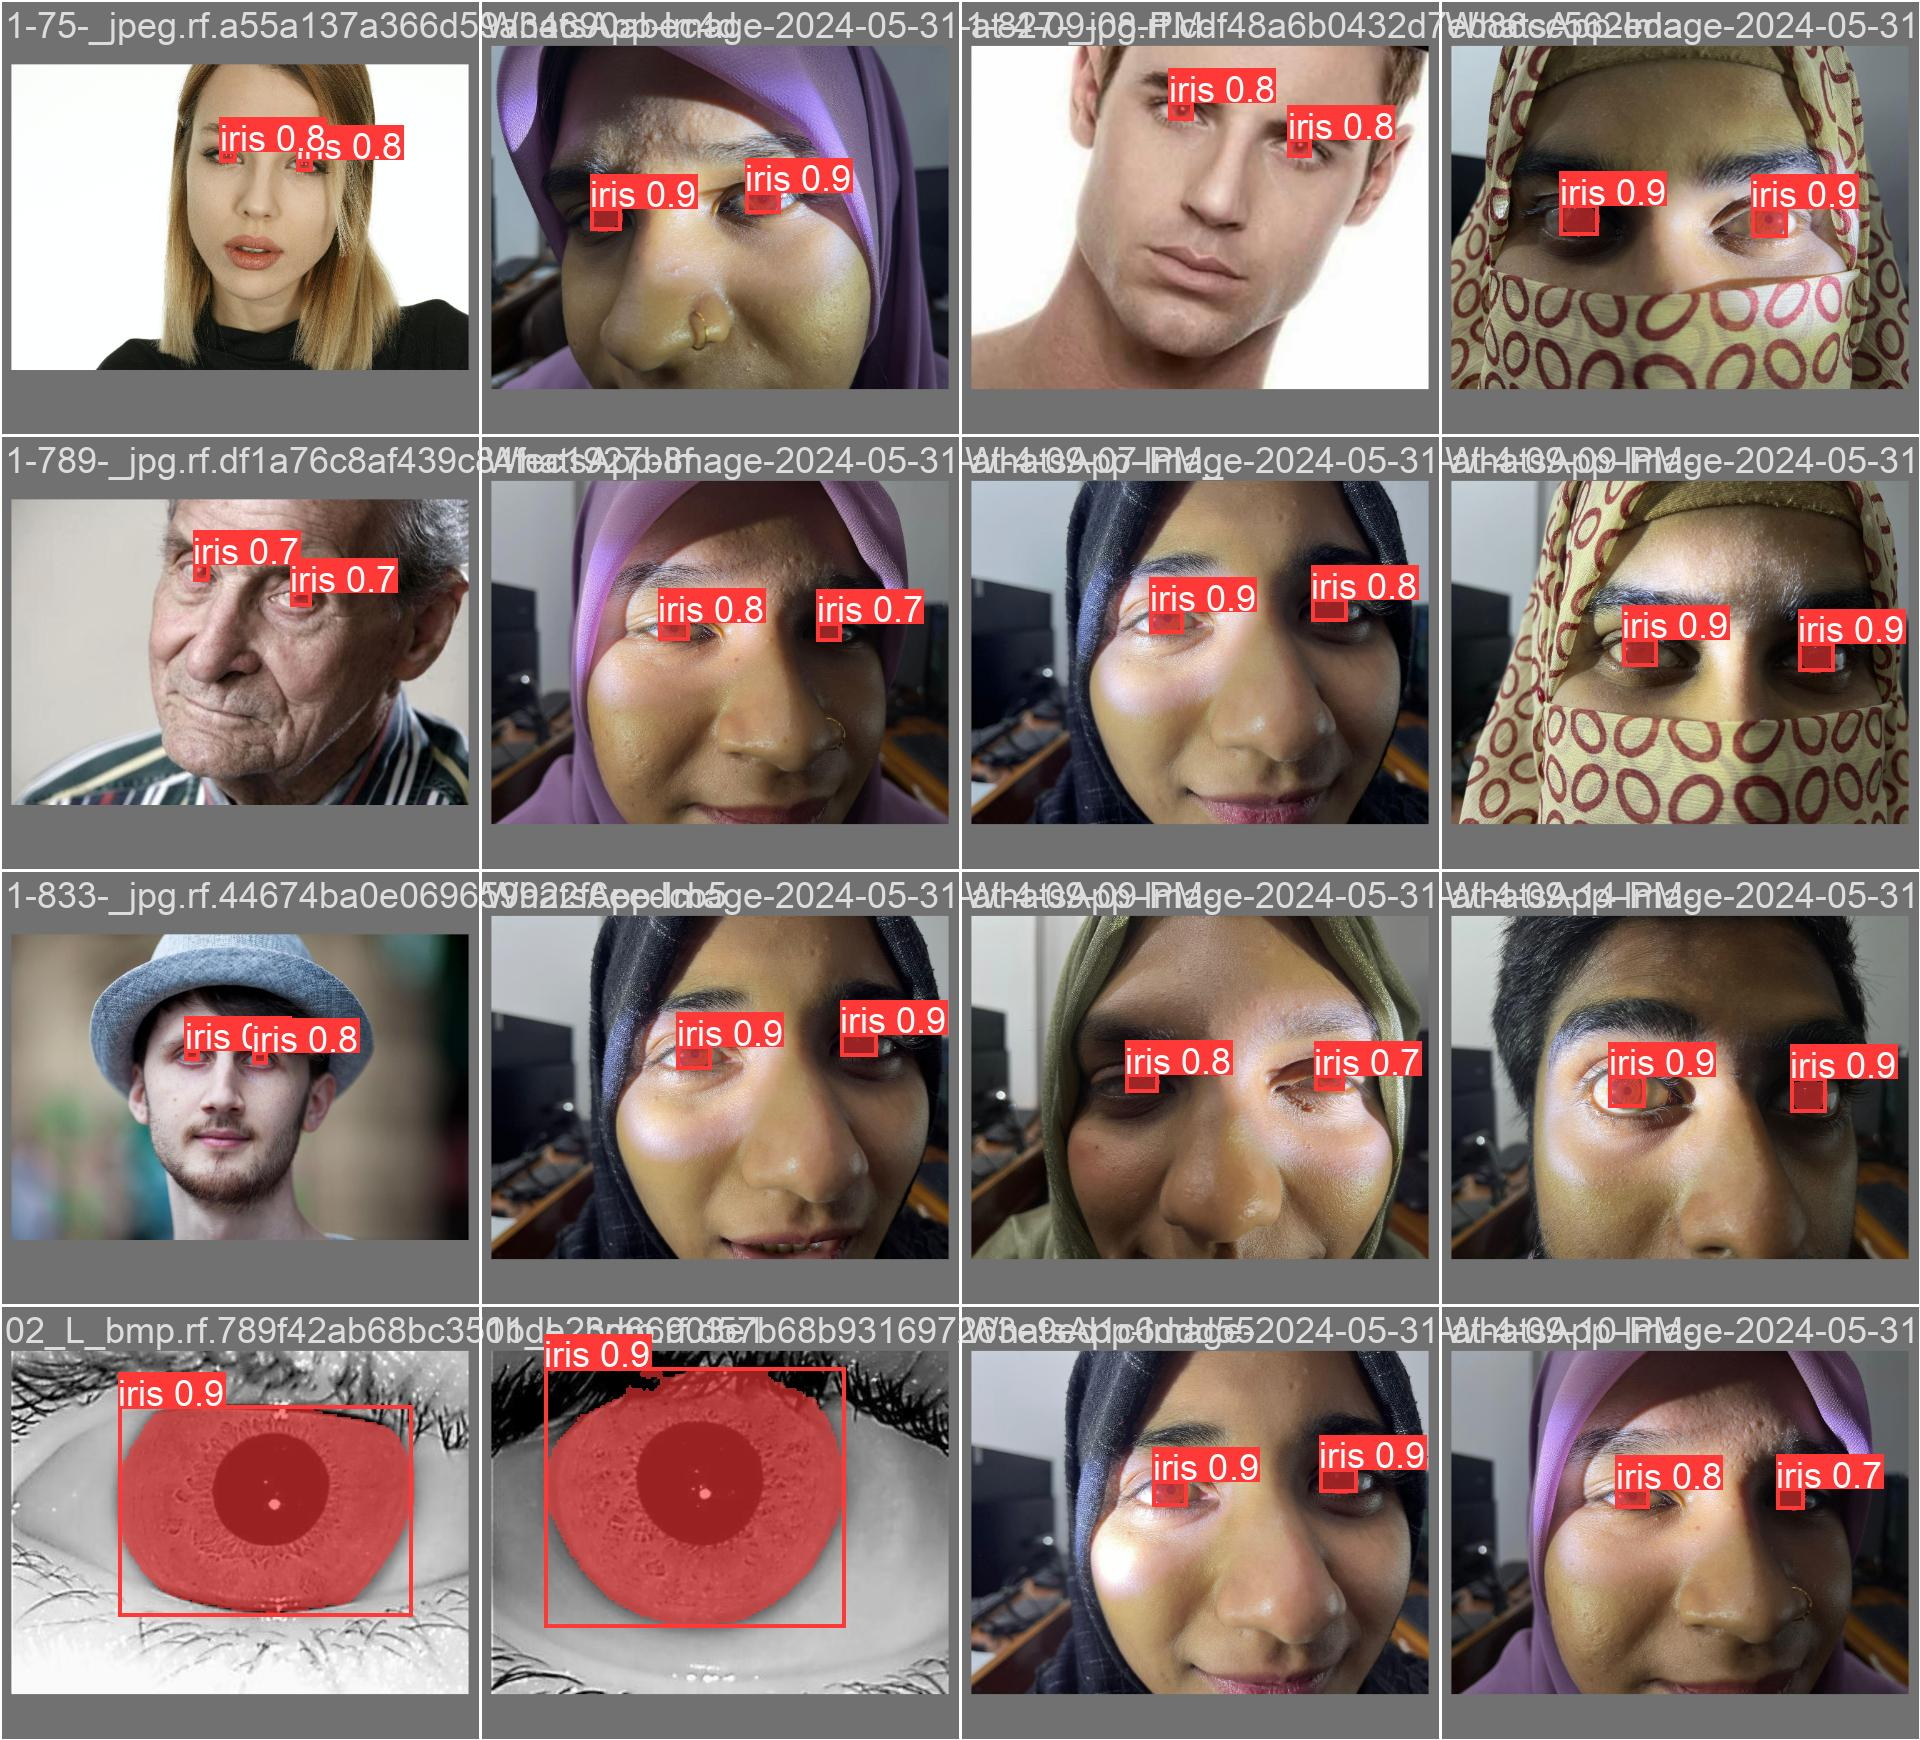

In [12]:
%cd {HOME}
Image(filename=f'/content/runs/segment/train/val_batch0_pred.jpg', width=600)

In [13]:
%cd {HOME}

!yolo task=segment mode=val model=/content/runs/segment/train/weights/best.pt data=/content/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/valid/labels.cache... 146 images, 3 backgrounds, 0 corrupt: 100% 146/146 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 10/10 [00:07<00:00,  1.26it/s]
                   all        146        211      0.965      0.967      0.982      0.763      0.954      0.957      0.974      0.684
Speed: 4.6ms preprocess, 19.5ms inference, 0.0ms loss, 6.9ms postprocess per image
Results saved to runs/segment/val
💡 Learn more at https://docs.ultralytics.com/modes/val


#Upload all images in predict folder


In [14]:
import os
import shutil
from google.colab import files

# Create the target directory if it doesn't exist
target_dir = '/content/predict'
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Prompt the user to upload multiple images
uploaded = files.upload()

# Move the uploaded files to the target directory
for filename in uploaded.keys():
    shutil.move(filename, os.path.join(target_dir, filename))

print(f"Files have been moved to {target_dir}")


Saving mehakL1.jpeg to mehakL1.jpeg
Saving mehakL2.jpeg to mehakL2.jpeg
Saving rfyL1.jpeg to rfyL1.jpeg
Saving rfyL2.jpeg to rfyL2.jpeg
Files have been moved to /content/predict


## Inference with Custom Model

In [15]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source=/content/predict save=true save_crop

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/4 /content/predict/mehakL1.jpeg: 576x640 1 iris, 125.6ms
image 2/4 /content/predict/mehakL2.jpeg: 576x640 1 iris, 20.4ms
image 3/4 /content/predict/rfyL1.jpeg: 640x640 1 iris, 23.8ms
image 4/4 /content/predict/rfyL2.jpeg: 640x608 1 iris, 143.5ms
Speed: 5.3ms preprocess, 78.3ms inference, 146.1ms postprocess per image at shape (1, 3, 640, 608)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


#Showing Segmented Iris

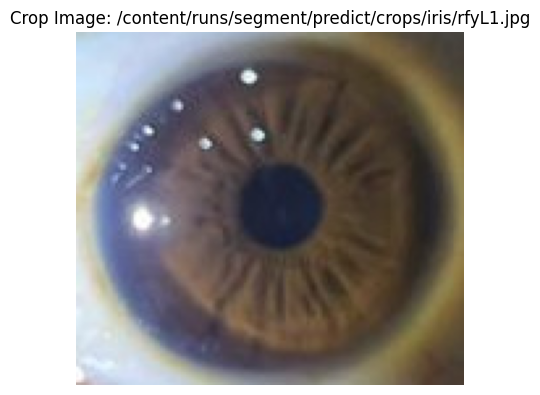

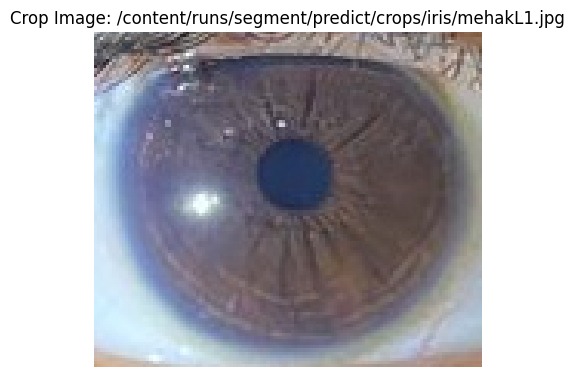

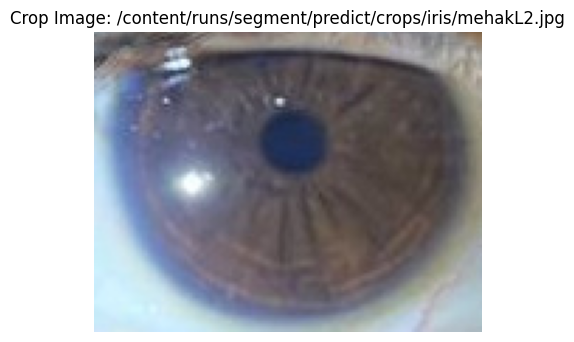

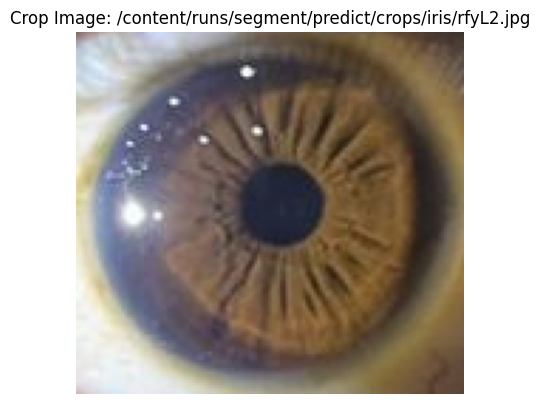

In [16]:
import cv2
import glob
from PIL import Image
import matplotlib.pyplot as plt

# Specify the folder containing the images
image_folder = '/content/runs/segment/predict/crops/iris'

# Get a list of image paths in the specified folder
image_paths = glob.glob(f'{image_folder}/*.jpg')

# Ensure that there are images in the folder
if len(image_paths) >= 1:
    for image_path in image_paths:
        # Read the image using OpenCV
        segmented_iris = cv2.imread(image_path)
        # Open the image using PIL
        crop_image = Image.open(image_path)

        # Plot the image
        plt.figure(figsize=[5, 5])
        plt.imshow(crop_image, cmap='gray')
        plt.axis('off')
        plt.title(f"Crop Image: {image_path}")
        plt.show()
else:
    print("Error: There are no images in the specified folder.")


#Pre Processing

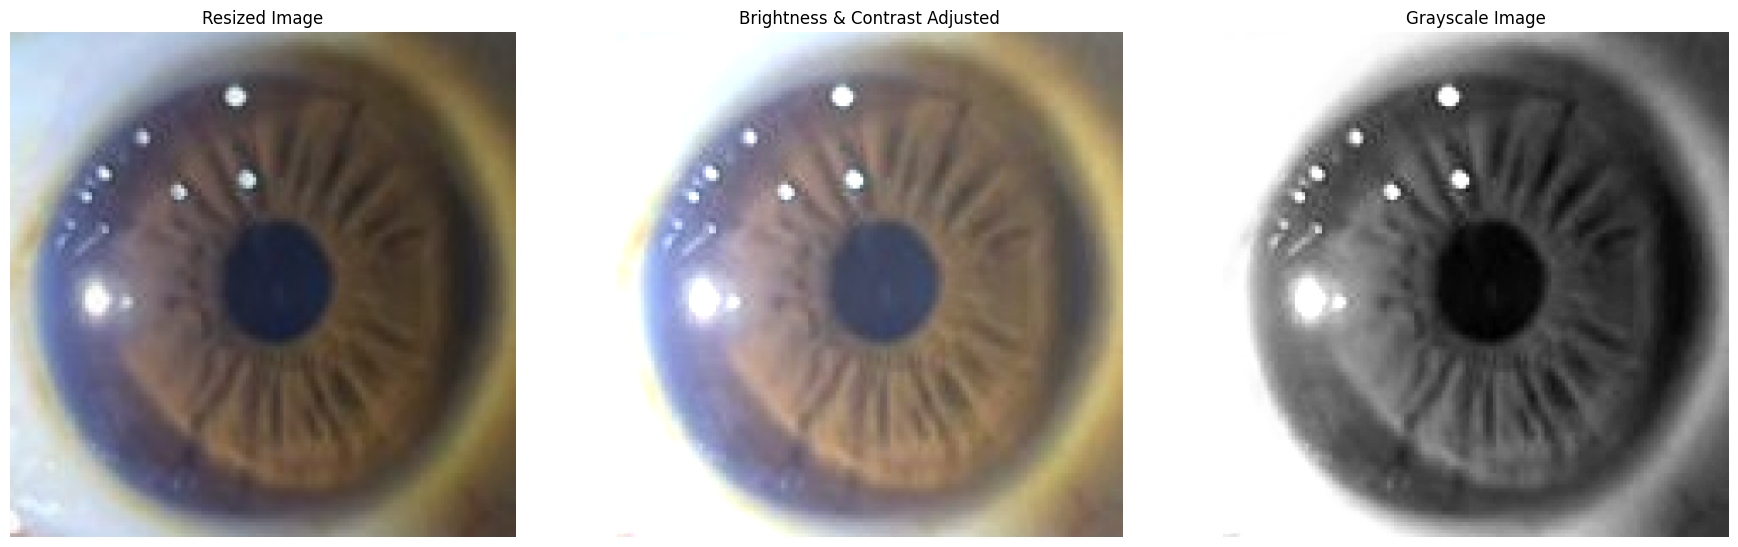

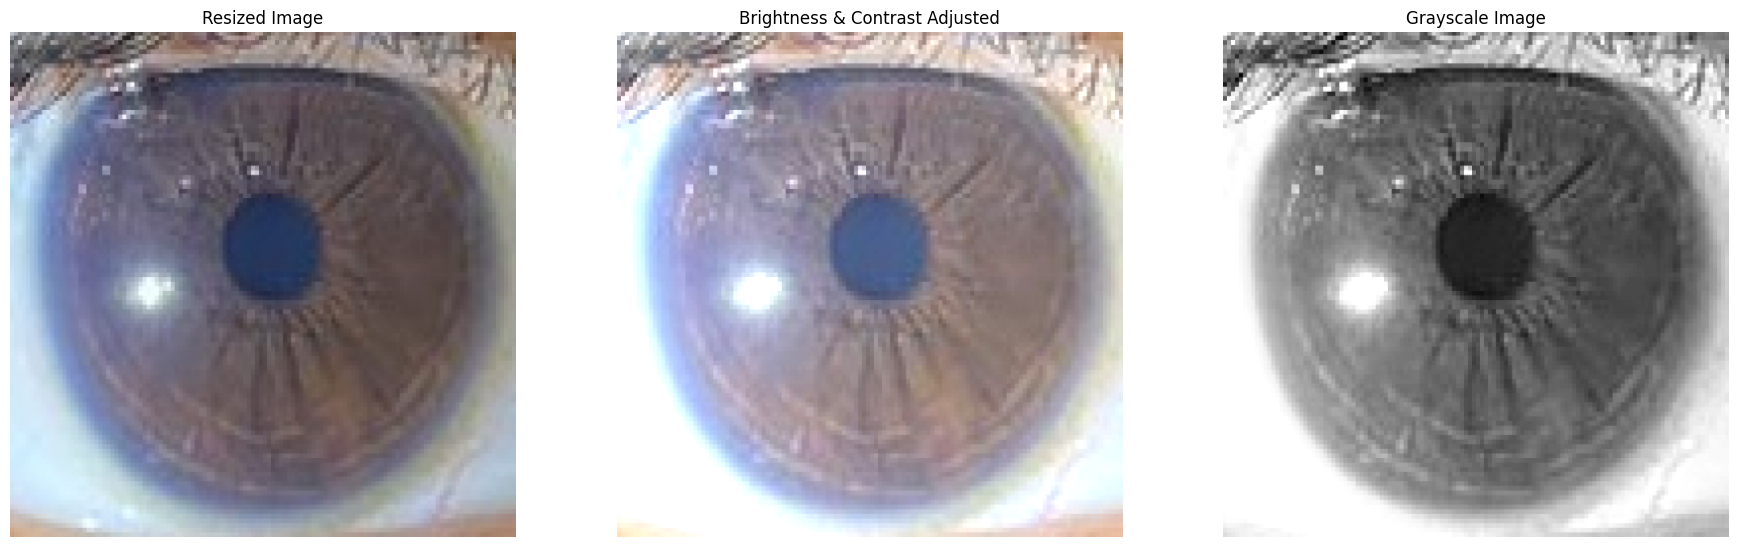

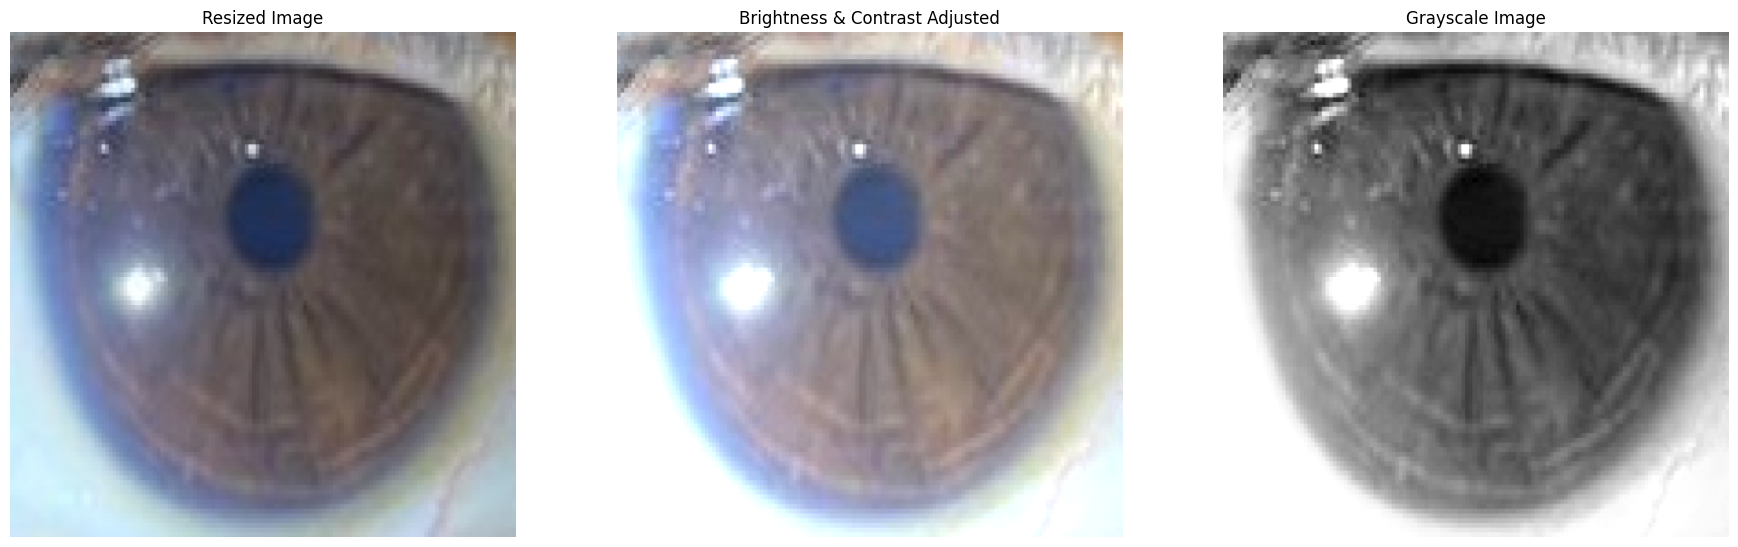

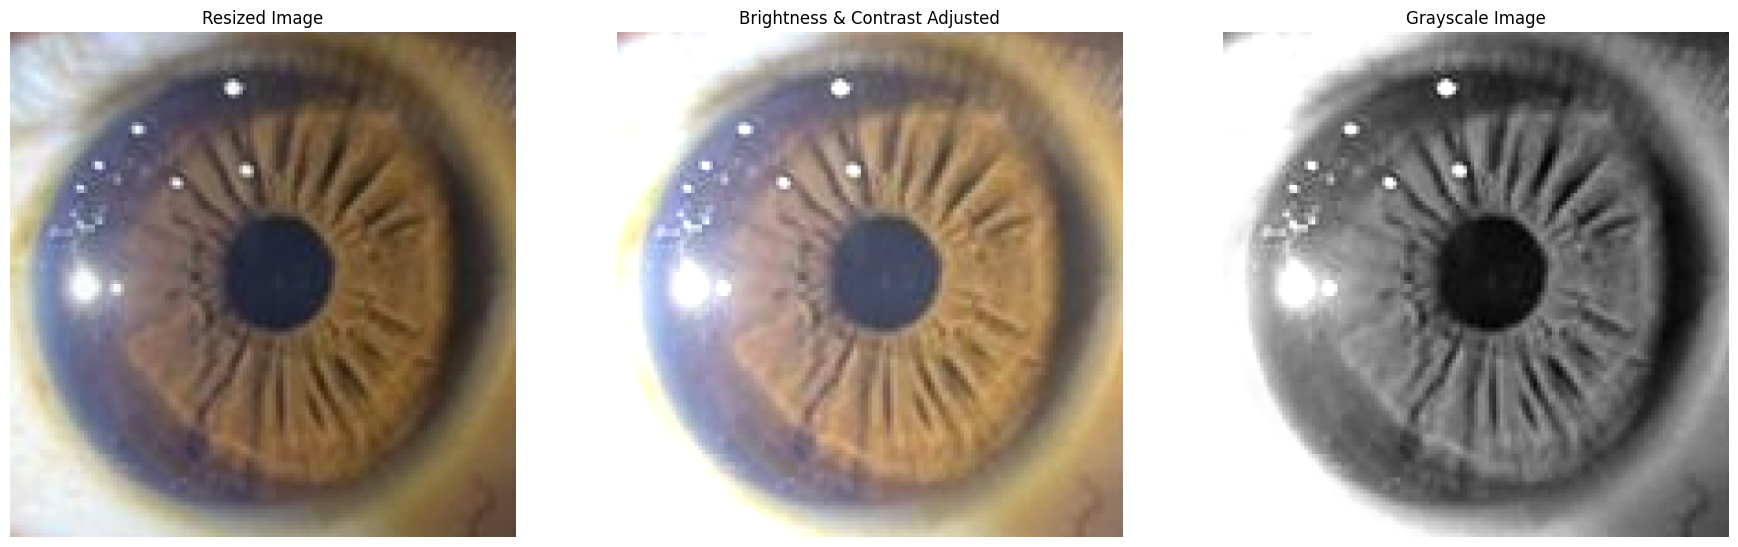

Final processed images have been saved to /content/predict2


In [17]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create the output directory
output_dir = '/content/predict2'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Function to adjust brightness and contrast
def adjust_brightness_contrast(image, alpha, beta):
    return cv2.addWeighted(image, alpha, image, 0, beta)

# Function to resize the image to a fixed size
def resize_image(image, size=(500, 500)):
    return cv2.resize(image, size, interpolation=cv2.INTER_AREA)

# Function for gamma correction
# def gamma_correction(image, gamma):
#     inv_gamma = 1.0 / gamma
#     table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
#     return cv2.LUT(image, table)

# Function to apply median filtering
# def median_filter(image, ksize=5):
#     return cv2.medianBlur(image, ksize)

# Function to apply histogram equalization
# def equalize_hist(image):
#     if len(image.shape) == 2:
#         return cv2.equalizeHist(image)
#     else:
#         ycrcb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
#         channels = list(cv2.split(ycrcb))
#         channels[0] = cv2.equalizeHist(channels[0])
#         ycrcb = cv2.merge(channels)
#         return cv2.cvtColor(ycrcb, cv2.COLOR_YCrCb2BGR)

# Function for Gaussian blurring
# def gaussian_blur(image, ksize=(5, 5)):
#     return cv2.GaussianBlur(image, ksize, 0)

# # Function for edge detection
# def edge_detection(image):
#     return cv2.Canny(image, 100, 200)

# # Function for morphological operations
# def morphological_operations(image):
#     kernel = np.ones((5,5), np.uint8)
#     return cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

# # Function to convert to HSV color space
# def convert_to_hsv(image):
#     return cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Specify the size to which all images will be resized
resize_to = (500, 500)

# Get all image files in the target directory
image_files = [os.path.join('/content/runs/segment/predict/crops/iris', f) for f in os.listdir('/content/runs/segment/predict/crops/iris') if f.endswith(('.jpg', '.jpeg', '.png'))]

# Preprocess each image and display the results
for image_file in image_files:
    image = cv2.imread(image_file)
    if image is not None:
        # Resize the image
        resized_image = resize_image(image, resize_to)

        # Apply brightness and contrast adjustment
        enhanced_image = adjust_brightness_contrast(resized_image, 1.2, 30)

        # Convert to grayscale
        grayscale_image = cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2GRAY)

        images_to_display = [
            resized_image,
            enhanced_image,
            grayscale_image
        ]
        titles = [
            'Resized Image',
            'Brightness & Contrast Adjusted',
            'Grayscale Image'
        ]

        plt.figure(figsize=[30, 30])
        for i, (img, title) in enumerate(zip(images_to_display, titles), 1):
            plt.subplot(3, 4, i)
            plt.imshow(img[:, :, ::-1] if len(img.shape) == 3 else img, cmap='gray')
            plt.title(title)
            plt.axis('off')
        plt.show()

        # Save the final processed image and the grayscale image in the output directory
        final_output_file = os.path.join(output_dir, f"final_{os.path.basename(image_file)}")
        # grayscale_output_file = os.path.join(output_dir, f"grayscale_{os.path.basename(image_file)}")

        cv2.imwrite(final_output_file, grayscale_image)
        # cv2.imwrite(grayscale_output_file, grayscale_image)
    else:
        print(f"Could not read image {image_file}")

print(f"Final processed images have been saved to {output_dir}")


#FE (VGG16)

In [19]:
import torch
from torchvision import models, transforms
from PIL import Image
import os

def get_feature_vector(img_path):

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available

    # Load pre-trained VGG16 model with weights frozen
    vgg16 = models.vgg16(pretrained=True)
    for param in vgg16.parameters():
        param.requires_grad = False  # Freeze weights

    # Move the model to the device (CPU or GPU)
    vgg16 = vgg16.to(device)

    # Extract features up to the last convolutional layer (pool5)
    features = vgg16.features  # Access convolutional layers

    img = Image.open(img_path).convert('RGB')  # Ensure RGB format
    img = img.resize((224, 224))  # Resize to VGG16's expected input size
    preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize pixel values
    ])
    img_tensor = preprocess(img).unsqueeze(0).to(device)  # Add batch dimension and move to device

    # Extract features
    with torch.no_grad():  # Disable gradient calculation for efficiency
        output = features(img_tensor)

    # Flatten the feature map into a feature vector
    feature_vector = output.view(output.size(0), -1)

    return feature_vector


#Cosine Similarity

In [22]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

def similarity_score(feature_vector1, feature_vector2):
  # Ensure tensors are on CPU before conversion
  feature_vector1 = feature_vector1.cpu().numpy()  # Move to CPU and convert to NumPy
  feature_vector2 = feature_vector2.cpu().numpy()  # Move to CPU and convert to NumPy

  # Calculate cosine similarity between the two feature vectors
  similarity = cosine_similarity(feature_vector1, feature_vector2)
  return similarity[0][0]


In [32]:
img_path = "/content/predict2/final_mehakL1.jpg"
img_path2 = "/content/predict2/final_rfyL2.jpg"
feature_vector1 = get_feature_vector(img_path)
feature_vector2 = get_feature_vector(img_path2)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [33]:
# Assuming feature_vector1 and feature_vector2 are available
similarity = similarity_score(feature_vector1, feature_vector2)
print("Cosine similarity score:", similarity)
similarity_percentage = similarity * 100
print("Similarity percentage:", similarity_percentage, "%")
if(similarity_percentage>=65):
  print("****************** IRIS MATCHED *********************")
else:
  print("****************** IRIS UNMATCHED!! ******************")

Cosine similarity score: 0.5851393
Similarity percentage: 58.5139274597168 %
****************** IRIS UNMATCHED!! ******************


#Individual Testing


(-0.5, 499.5, 499.5, -0.5)

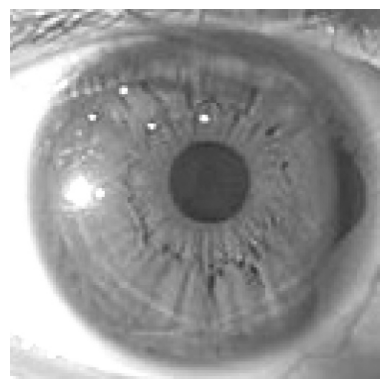

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Example usage
image_path = "/content/predict2/final_nashL1.jpg"
# normalized_iris = perform_iris_normalization(image_path)
# Display the normalized iris
# plt.imshow(cv2.cvtColor(normalized_iris, cv2.COLOR_BGR2RGB))
# plt.axis('on')
# plt.show()
feature_vector1 = extract_features(image_path)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

(-0.5, 499.5, 499.5, -0.5)

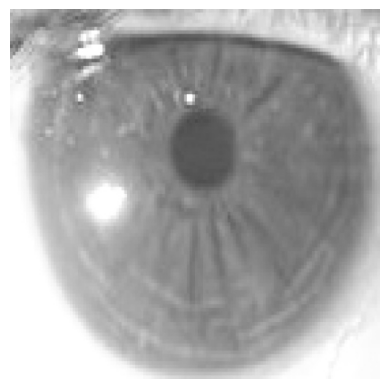

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Example usage
image_path2 = "/content/predict2/final_mehakL2.jpg"
# normalized_iris2 = perform_iris_normalization(image_path2)
# # Display the normalized iris
# plt.imshow(cv2.cvtColor(normalized_iris2, cv2.COLOR_BGR2RGB))
# plt.axis('on')
# plt.show()
feature_vector2 = extract_features(image_path2)
# print("Feature vector shape:", feature_vector1.shape)
# print("Feature vector:", feature_vector1)
img2 = cv2.imread(image_path2)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.axis('off')

Matching Iris (Cosine Similarity)

Cosine similarity score: 0.7893518
Similarity percentage: 78.93518209457397 %


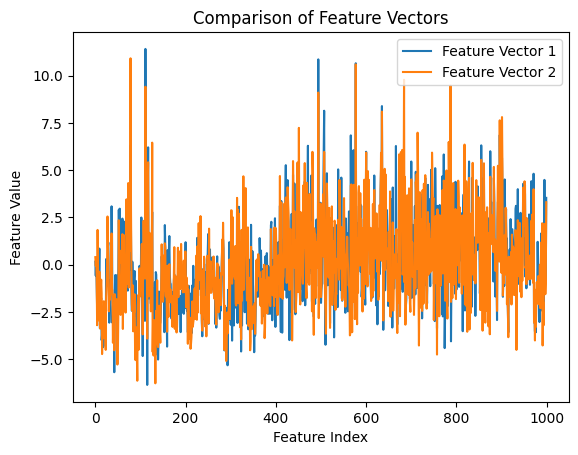

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

def similarity_score(feature_vector1, feature_vector2):
    # Reshape feature vectors to ensure they have the same shape
    feature_vector1 = np.reshape(feature_vector1, (1, -1))
    feature_vector2 = np.reshape(feature_vector2, (1, -1))

    # Calculate cosine similarity between the two feature vectors
    similarity = cosine_similarity(feature_vector1, feature_vector2)
    return similarity[0][0]

# Assuming feature_vector1 and feature_vector2 are numpy arrays
similarity = similarity_score(feature_vector1, feature_vector2)
print("Cosine similarity score:", similarity)
similarity_percentage = similarity * 100
print("Similarity percentage:", similarity_percentage, "%")

# Plotting the feature vectors
plt.plot(feature_vector1, label='Feature Vector 1')
plt.plot(feature_vector2, label='Feature Vector 2')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.title('Comparison of Feature Vectors')
plt.legend()
plt.show()


#Automate Testing


In [ ]:
!pip install --upgrade google-auth gspread pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.7/193.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 44.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.27.0
    Uninstalling google-auth-2.27.0:
      Successfully uninstalled google-auth-2.27.0
  Attempting uninstall: gspread
    Found existing installation: gspread 6.0.2
    Uninstalling gspread-6.0.2:
      Successfully uninstalled gspread-6.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.2 which is incompatible.


Cosine Similarity

In [ ]:
# Function to calculate similarity score
def similarity_score(feature_vector1, feature_vector2):
    # feature_vector1 = np.reshape(feature_vector1, (1, -1))
    # feature_vector2 = np.reshape(feature_vector2, (1, -1))
    similarity = cosine_similarity(feature_vector1, feature_vector2)
    return similarity[0][0]

Integrate Google Sheet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import gspread
from google.colab import auth
from google.auth import default

# Authenticate and create the client
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# Open the Google Sheet
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1hU93Z4jgHk2cAsdrxxhwATXeDJ2gtY3CbH2L8OPiTzo/edit?gid=1866259954#gid=1866259954'  # Replace with your spreadsheet URL
spreadsheet = gc.open_by_url(spreadsheet_url)
# List all sheets
sheet_names = spreadsheet.worksheets()
print("Available sheets:")
for sheet in sheet_names:
    print(sheet.title)

desired_sheet_name = 'Unmatched Iris(Iris Scanner)'  # Replace with the actual sheet name you want to access

worksheet = spreadsheet.worksheet(desired_sheet_name)
expected_headers = ['Person 1', 'Person 2', 'Similarity(VGG16)']

# Convert the worksheet to a DataFrame
data = worksheet.get_all_records(expected_headers=expected_headers)
df = pd.DataFrame(data)

# Debugging: Print the DataFrame to ensure it is loaded correctly
print("DataFrame loaded:")
print(df)




Available sheets:
Unmatched Iris
Matched Iris
Matched Iris(Iris Scanner)
Unmatched Iris(Iris Scanner)
DataFrame loaded:
     Person 1 Person 2 Similarity(DenseNet) Similarity(VGG16)                 
0          a1       b1                                                        
1          a1       c1                                                        
2          a1       d1                                         85% (threshold)
3          a1       e1                                                       0
4          a1       f1                                                       0
...       ...      ...                  ...               ...              ...
1321       w2       y2                                                        
1322       w2       z2                                                        
1323       x2       y2                                                        
1324       x2       z2                                                        
1325       

In [ ]:
import os
import pandas as pd

# Assuming get_feature_vector and similarity_score functions are defined elsewhere

# Iterate over the rows in the DataFrame
for index, row in df.iterrows():
    # print(row['Person 1'])
    # if not pd.isna(row['Similarity']):  # Skip if similarity already calculated
    #     continue
    # Get the image paths
    img1_name = row['Person 1']
    img2_name = row['Person 2']
    image_path1 = f"/content/predict2/final_{img1_name}.jpg"
    image_path2 = f"/content/predict2/final_{img2_name}.jpg"

    # Check if both image files exist
    if not os.path.exists(image_path1) or not os.path.exists(image_path2):
        print(f"Skipping row {index} because one or both image files do not exist.")
        continue

    # Extract features
    feature_vector1 = get_feature_vector(image_path1)
    feature_vector2 = get_feature_vector(image_path2)

    # Calculate similarity
    similarity = similarity_score(feature_vector1, feature_vector2)
    similarity_percentage = similarity * 100

    # Update the DataFrame
    df.at[index, 'Similarity(VGG16)'] = similarity_percentage

    # Update the Google Sheet
    worksheet.update_cell(index + 2, df.columns.get_loc('Similarity(VGG16)') + 1, similarity_percentage)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Skipping row 1 because one or both image files do not exist.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated si

Skipping row 27 because one or both image files do not exist.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated si

Skipping row 51 because one or both image files do not exist.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated si

Skipping row 77 because one or both image files do not exist.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated si

Skipping row 101 because one or both image files do not exist.
Skipping row 102 because one or both image files do not exist.
Skipping row 103 because one or both image files do not exist.
Skipping row 104 because one or both image files do not exist.
Skipping row 105 because one or both image files do not exist.
Skipping row 106 because one or both image files do not exist.
Skipping row 107 because one or both image files do not exist.
Skipping row 108 because one or both image files do not exist.
Skipping row 109 because one or both image files do not exist.
Skipping row 110 because one or both image files do not exist.
Skipping row 111 because one or both image files do not exist.
Skipping row 112 because one or both image files do not exist.
Skipping row 113 because one or both image files do not exist.
Skipping row 114 because one or both image files do not exist.
Skipping row 115 because one or both image files do not exist.
Skipping row 116 because one or both image files do not

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated si

Skipping row 174 because one or both image files do not exist.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated si

Skipping row 221 because one or both image files do not exist.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated si

Skipping row 267 because one or both image files do not exist.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated si

Skipping row 312 because one or both image files do not exist.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated si

Skipping row 356 because one or both image files do not exist.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated si

Skipping row 399 because one or both image files do not exist.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated si

Skipping row 441 because one or both image files do not exist.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated si

Skipping row 482 because one or both image files do not exist.


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated si